In [1]:
# Flight Price:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the 
# dataset have?

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the 
# distribution.

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different 
# airlines.

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how 
# they may impact your analysis.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset 
# to identify the peak travel season. What features would you analyze to identify the peak season, and how 
# would you present your findings to your boss?

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight 
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these 
# trends, and what visualizations would you use to present your findings to your team?

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the 
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to 
# identify these factors, and how would you present your findings to the management team?

## Flight Price Prediction(EDA + Feature Engineering)

In [2]:
## Ans 1

In [3]:
## import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel('flight_price.xlsx')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 10683 rows × 11 columns

In [6]:
## Ans 2

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


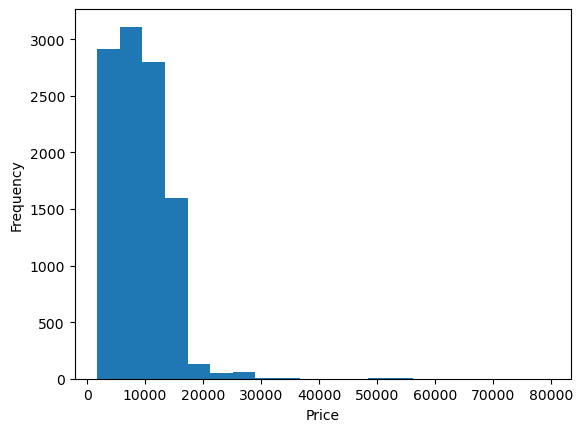

In [9]:

# Plot a histogram of the price feature
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## price are right skewed

In [10]:
## Ans 3

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
price_range = df['Price'].describe()[['min', 'max']]
print(price_range)

min     1759.0
max    79512.0
Name: Price, dtype: float64


## price :-
1. min_value = 1759.0
2. max_value = 79512.0

In [13]:
## Ans 4

In [14]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

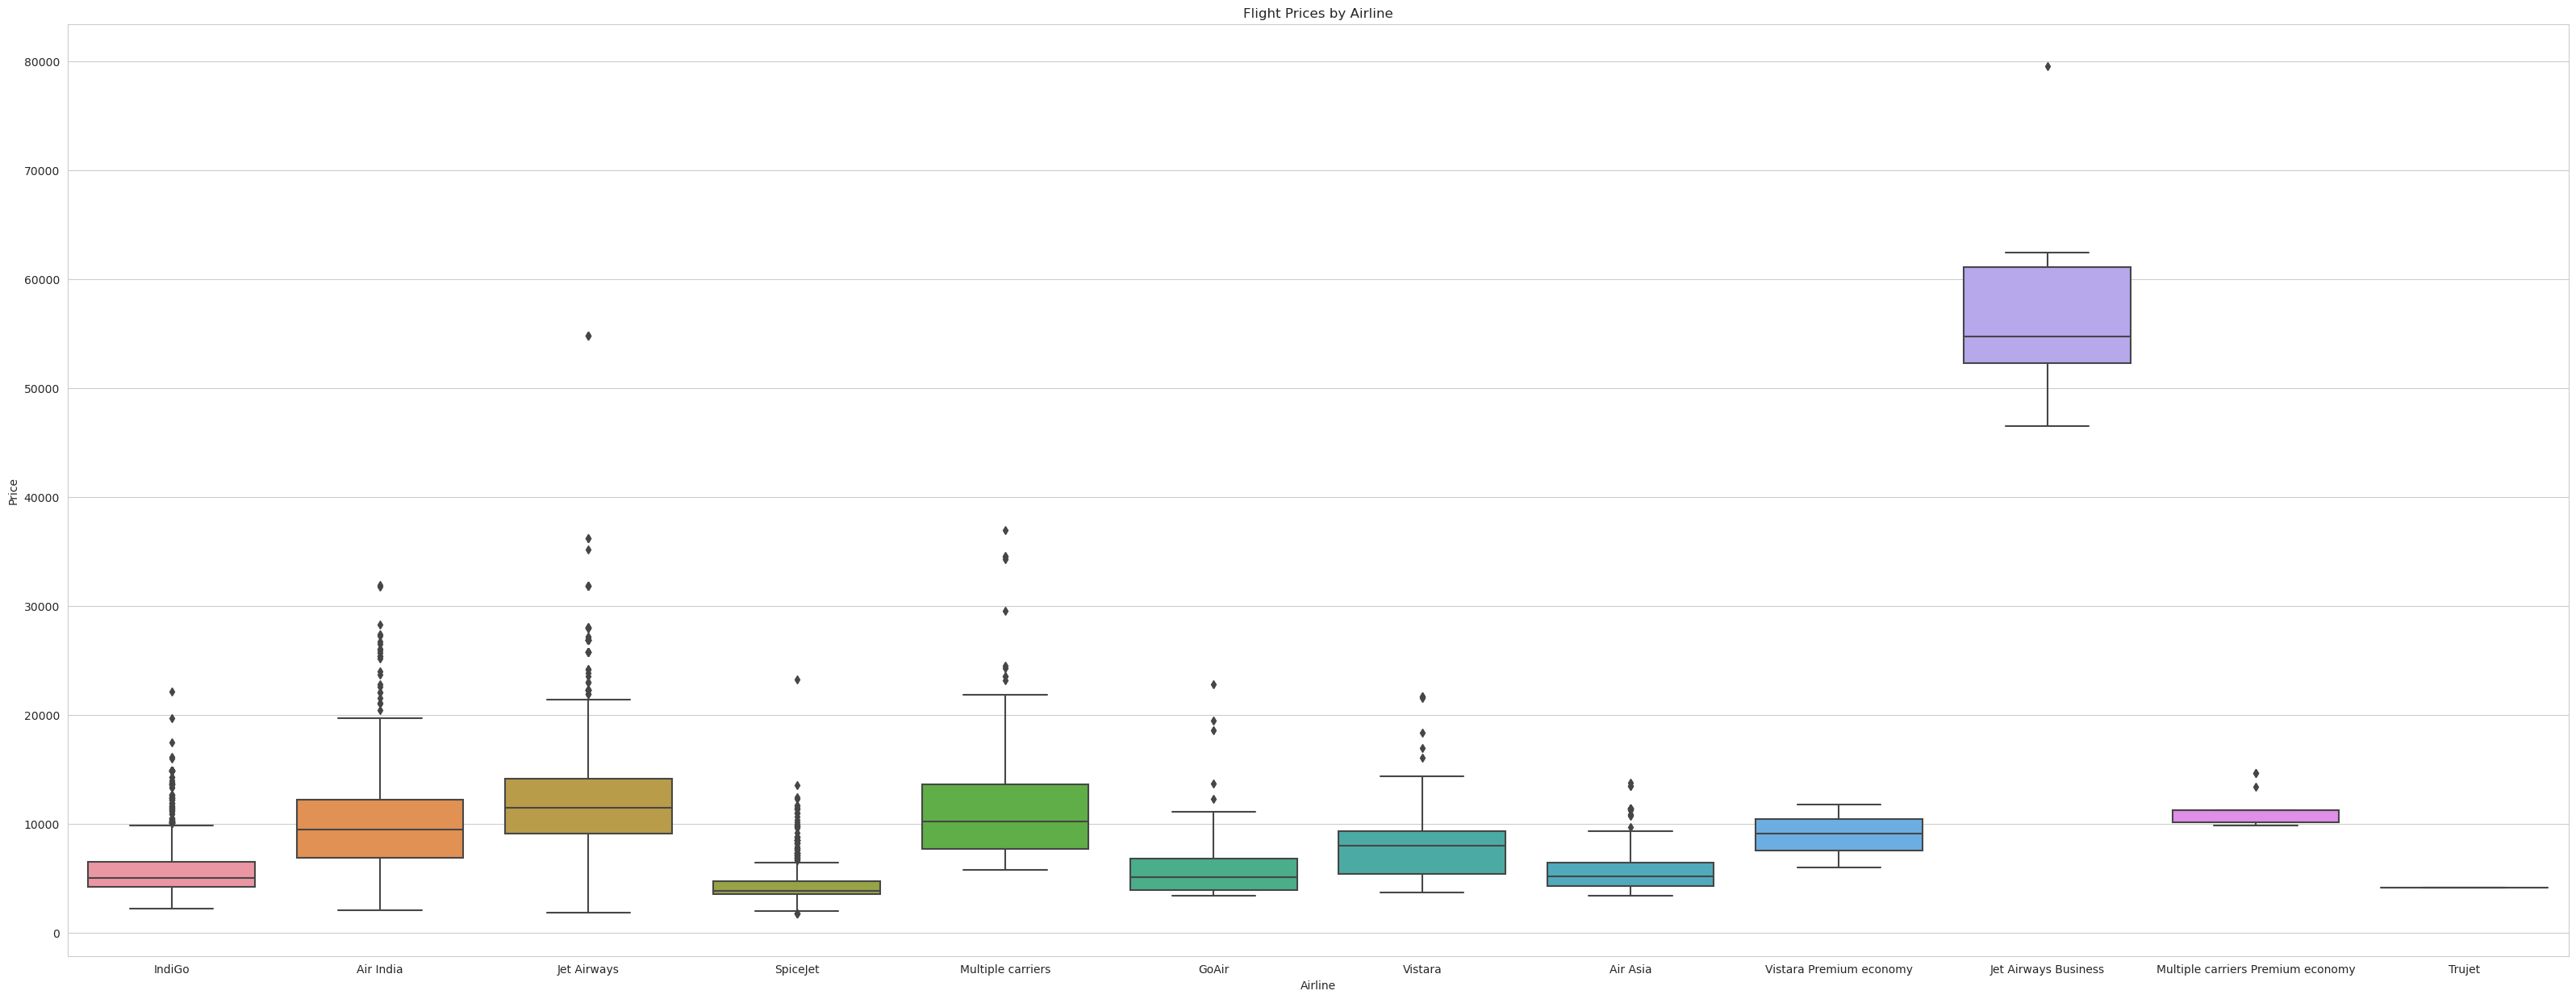

In [15]:


sns.set_style('whitegrid')
plt.figure(figsize=(40,15))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.show()


## I/O
1. max. price is 'Jet Airways Business'
2. min. price is 'IndiGo'
3. all airline as outliers except 'Trujet'


In [16]:
## Ans 5

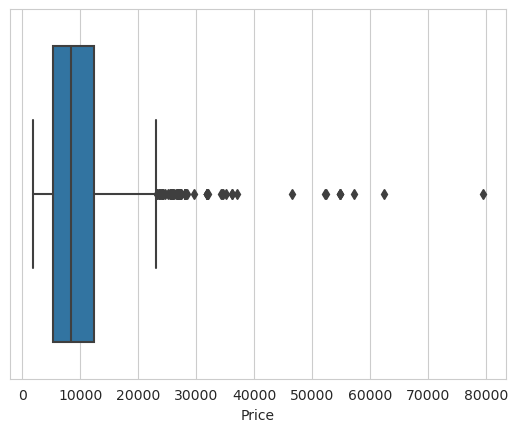

In [17]:
sns.boxplot(x=df['Price'])
plt.show()

## I/O
1. there are outliers in the dataset, they can impact the analysis in various ways. 
They can affect the measures of central tendency, such as the mean and median, making them less representative of the majority of the data.
Additionally, they can skew the distribution of the data, leading to incorrect assumptions about the data's normality. 
Therefore, it is important to identify and handle outliers appropriately in the analysis.

In [18]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset 
# to identify the peak travel season. What features would you analyze to identify the peak season, and how 
# would you present your findings to your boss?

In [19]:
## Ans 6

In [20]:
# Month of Travel: We can analyze the distribution of flights and prices based on the month of travel. 
# We can plot the number of flights or the total ticket prices against the months of the year and look for any patterns or spikes.

# Source City and Destination City: We can also analyze the source and destination cities and see if there are any patterns in 
# the number of flights or ticket prices for each city. This can help us identify popular travel destinations during specific months.

# Departure and Arrival Time: We can also analyze the departure and arrival times and see if there are any patterns in the number of flights
# or ticket prices for specific time slots.

In [21]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [23]:
# Create a new column for the month of the departure date
df['Departure Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

/tmp/ipykernel_110/2327556315.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Departure Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month


In [24]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1


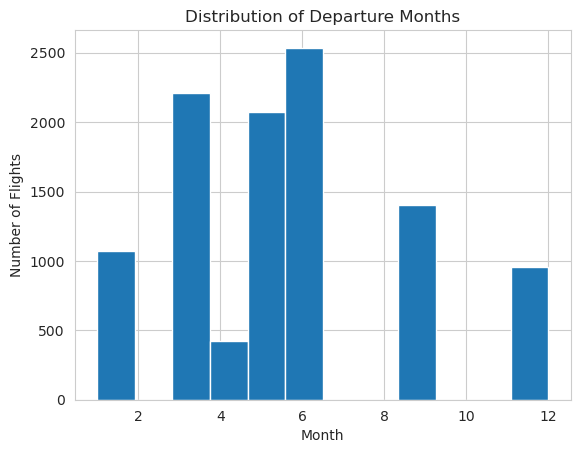

In [29]:
# Create a histogram of the departure month
plt.hist(df['Departure Month'], bins=12)
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Distribution of Departure Months')
plt.show()

## I/O
1. maximm departure in june month
2. minimum departure in April month
3. but March & May are also a good rush in departure
4. In the month january and december Avg. departure

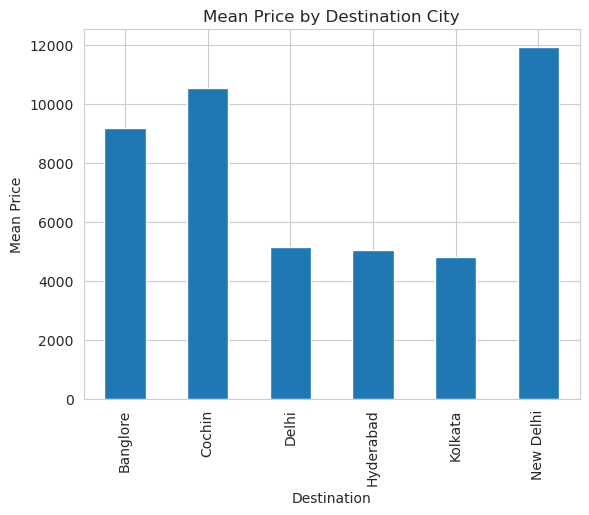

In [26]:
# Create a bar chart of the mean price by destination city
price_by_city = df.groupby('Destination')['Price'].mean()
price_by_city.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Mean Price')
plt.title('Mean Price by Destination City')
plt.show()


## I/O
1. here highest destination city is New delhi.
2. lowest destination ciy is kolkata.
3. below Avg. destination city are Delhi , Hyderabad.
4. Above Avg. destination city is Banglore , Cochin.

In [31]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight 
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these 
# trends, and what visualizations would you use to present your findings to your team?

In [32]:
## Ans 7

In [33]:

# To identify trends in flight prices, I would analyze the following features from the Flight Price dataset:

# Airline
# Source City
# Destination City
# Stops
# Departure Time
# Arrival Time
# Duration
# Class
# Days Left
# To analyze the relationship between each feature and the ticket price, I would create visualizations such as scatter plots, box plots, and histograms. 
# Here are some examples:

# Scatter plots - to show the relationship between continuous features like duration and price
# Box plots - to visualize the distribution of ticket prices for categorical features like airline or class
# Histograms - to show the frequency distribution of ticket prices for different departure times, arrival times, or days left.
# Line charts to show the trend of prices over time.
# Heat maps to identify correlations between different features and the target variable.

# I would also use a correlation matrix to identify any significant correlations between the features and ticket price. 
# This would help me determine which features have the strongest relationship with ticket price and prioritize those features for further analysis.

# Finally, I would present my findings to the team using a combination of these visualizations along with a summary of the key insights and trends observed in the data.

In [34]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the 
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to 
# identify these factors, and how would you present your findings to the management team?

In [35]:
## Ans 8

In [ ]:
# To identify the factors that affect flight prices, the following features can be analyzed:

# Airline: Analyze the prices offered by different airlines to see if there are any patterns or significant differences.
# Source City/Destination City: Analyze the prices offered for different source and destination cities to identify any patterns or variations.
# Departure Time/Arrival Time: Analyze the prices for different departure and arrival times to identify any patterns or variations.
# Stops: Analyze the prices for different numbers of stops to identify any patterns or variations.
# Class: Analyze the prices for different classes (Business and Economy) to identify any patterns or variations.
# Duration: Analyze the prices for different durations to identify any patterns or variations.
# To present the findings to the management team, the following visualizations can be used:

# Box plot to show the distribution of prices for different airlines, source/destination cities, departure/arrival times, and number of stops.
# Scatter plot to show the relationship between price and duration, and to identify any correlation between the two.
# Bar plot to show the mean price for different airlines, source/destination cities, departure/arrival times, and number of stops.
# Heatmap to show the correlation between different features and the price.

In [36]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1


In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [38]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure Month
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Departure Month  10683 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.7+ KB


In [42]:
## converet aeprate Date & Year
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [44]:
##mconveret all in int 
df['Date']=df['Date'].astype(int)
df['Year']=df['Year'].astype(int)

In [45]:
## Drop the Date_of_journey column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [46]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure Month,Date,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1,2019


In [47]:
## Arrival_Time
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [50]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [51]:
## Dep_Time
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [52]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure Month,Date,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,01,10 22 Mar,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,1,2019,13,15,5,50


In [54]:
## ToTal_stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [55]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [56]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Departure Month,Date,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,3,24,2019,01,10 22 Mar,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,1,2019,13,15,5,50


In [65]:
## Work on Duration
type(df['Duration'])

pandas.core.series.Series

In [66]:
df['Duration'].str.split(' ').str[0]

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Duration, Length: 10683, dtype: object

In [67]:
df['Duration'].str.split(' ').str[0].str.split('h')

0         [2, ]
1         [7, ]
2        [19, ]
3         [5, ]
4         [4, ]
          ...  
10678     [2, ]
10679     [2, ]
10680     [3, ]
10681     [2, ]
10682     [8, ]
Name: Duration, Length: 10683, dtype: object

In [68]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_hour']=df['Duration_hour'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [69]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Departure Month,Date,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,6,2019,16,55,16,50,5m


In [70]:
df.drop(6474,inplace=True)

In [71]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [72]:
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [73]:
df.drop('Duration',axis=1,inplace=True)

In [74]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Departure Month,Date,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,3,24,2019,01,10 22 Mar,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,9,2019,04,25 10 Jun,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,1,2019,21,35,16,50,4,45


In [77]:
df['Duration_min'].isnull().sum()

1031

In [79]:

# Fill null values with the median of the column
df['Duration_min'].fillna(df['Duration_min'].median(), inplace=True)


In [80]:
df['Duration_min'].isnull().sum()

0

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Departure Month,Date,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,3,24,2019,01,10 22 Mar,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,9,2019,04,25 10 Jun,9,25,19,30.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,No info,4107,9,9,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0.0,No info,4145,4,27,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0.0,No info,7229,4,27,2019,11,20,8,20,3,30.0
10681,Vistara,Banglore,New Delhi,0.0,No info,12648,1,1,2019,14,10,11,30,2,40


In [82]:
df['Duration_min']=df['Duration_min'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10681 non-null  float64
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  int64  
 6   Departure Month  10682 non-null  int64  
 7   Date             10682 non-null  int64  
 8   Year             10682 non-null  int64  
 9   Arrival_hour     10682 non-null  object 
 10  Arrival_min      10682 non-null  object 
 11  Dep_hour         10682 non-null  int64  
 12  Dep_min          10682 non-null  int64  
 13  Duration_hour    10682 non-null  int64  
 14  Duration_min     10682 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.3+ MB


In [84]:
df.describe()

,Total_Stops,Price,Departure Month,Date,Year,Dep_hour,Dep_min,Duration_hour,Duration_min
count,10681.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824080,9086.292735,5.534731,13.509081,2019.0,12.490358,24.408819,10.247051,31.225426
std,0.675164,4610.885695,2.987626,8.479363,0.0,5.748819,18.767225,8.495234,14.196348
min,0.000000,1759.000000,1.000000,1.000000,2019.0,0.000000,0.000000,1.000000,5.000000
25%,0.000000,5277.000000,3.000000,6.000000,2019.0,8.000000,5.000000,2.000000,20.000000
50%,1.000000,8372.000000,5.000000,12.000000,2019.0,11.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,6.000000,21.000000,2019.0,18.000000,40.000000,15.000000,45.000000
max,4.000000,79512.000000,12.000000,27.000000,2019.0,23.000000,55.000000,47.000000,55.000000


/tmp/ipykernel_110/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

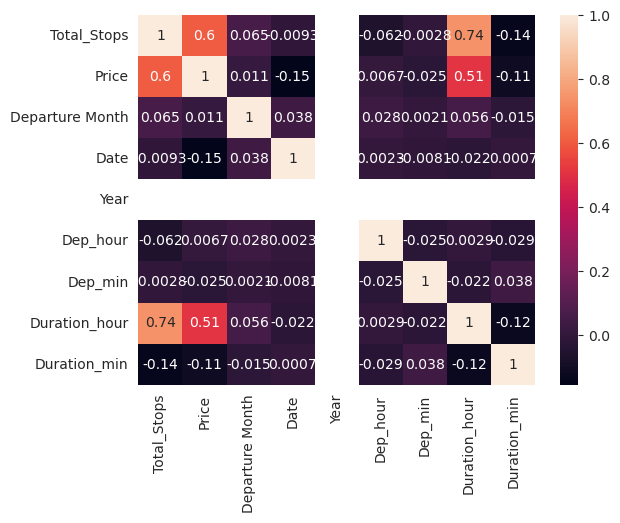

In [85]:
sns.heatmap(df.corr(),annot=True)

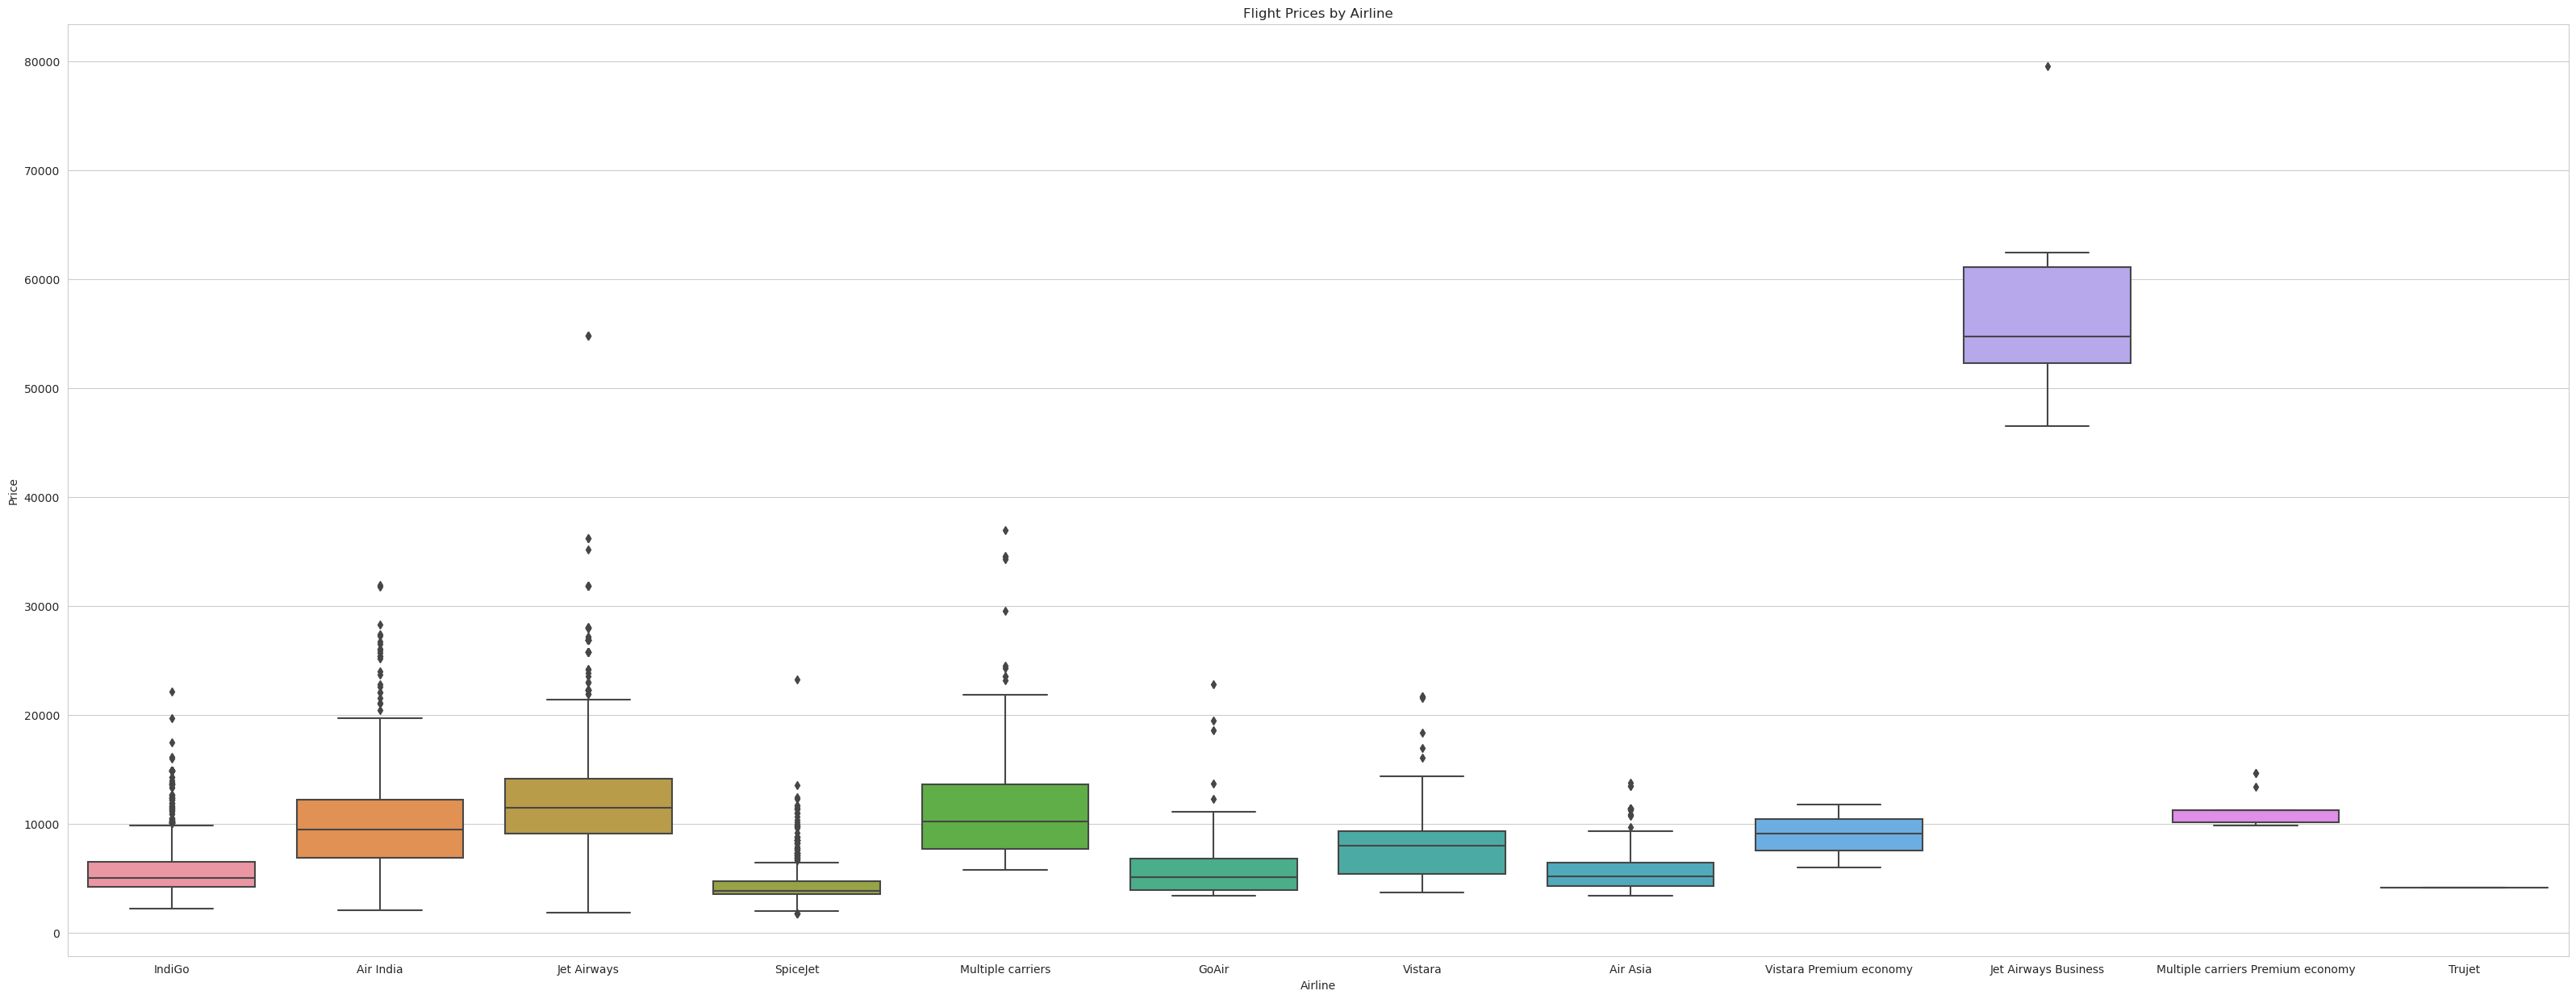

In [86]:
sns.set_style('whitegrid')
plt.figure(figsize=(40,15))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.show()

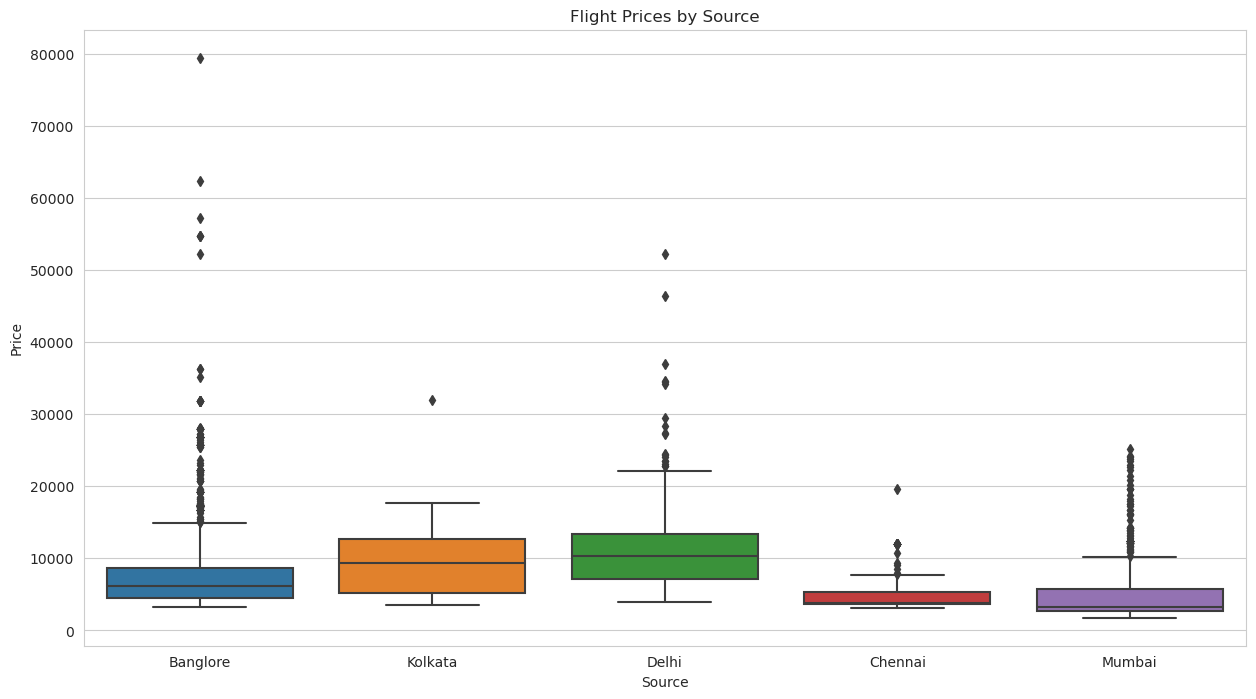

In [88]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Flight Prices by Source')
plt.show()

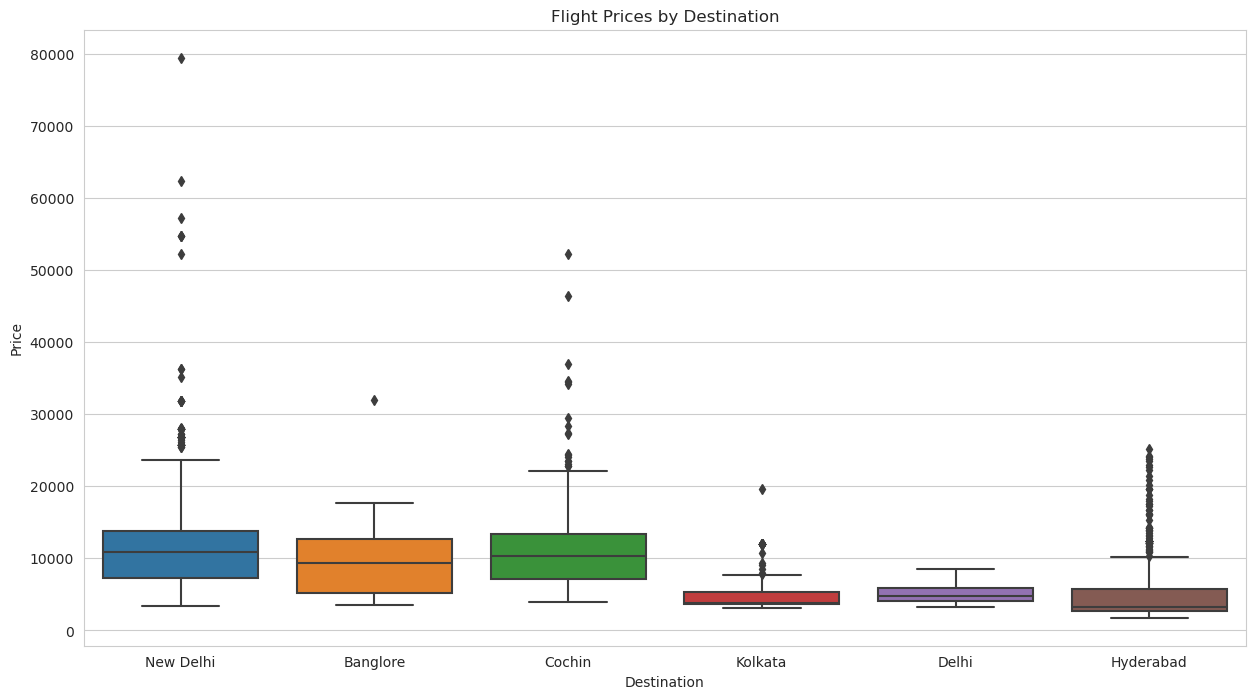

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Flight Prices by Destination')
plt.show()

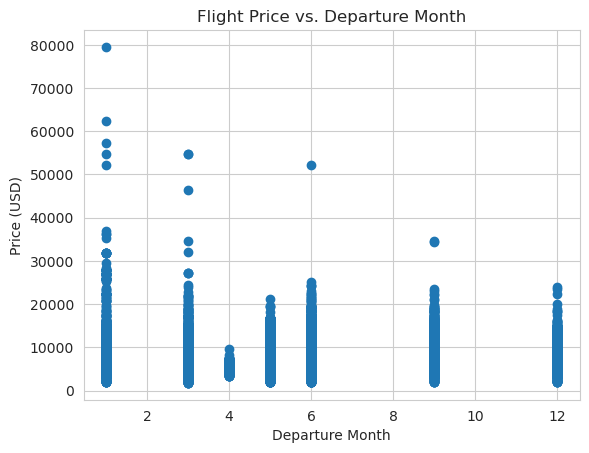

In [91]:
# Create a scatter plot of price vs. duration
plt.scatter(df['Departure Month'], df['Price'])

# Set the plot title and axis labels
plt.title('Flight Price vs. Departure Month')
plt.xlabel('Departure Month')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()


## Google Playstore dataset

In [92]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does 
# the dataset have?

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different 
# app categories.

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may 
# impact your analysis.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize 
# the relationship.

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps 
# with the highest number of installs.

# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the 
# Google Playstore dataset to identify the most popular app categories. How would you approach this 
# task, and what features would you analyze to make recommendations to the company?

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the 
# most successful app developers. What features would you analyze to make recommendations to the 
# company, and what data visualizations would you use to present your findings?

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to 
# launch a new app. What features would you analyze to make recommendations to the company, and 
# what data visualizations would you use to present your findings?

In [99]:
## Ans 9

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [139]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## In Above Data set :--     10841 rows × 13 columns

In [140]:
## Ans 10 - 14

In [141]:
df1['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

<AxesSubplot: xlabel='Category', ylabel='Rating'>

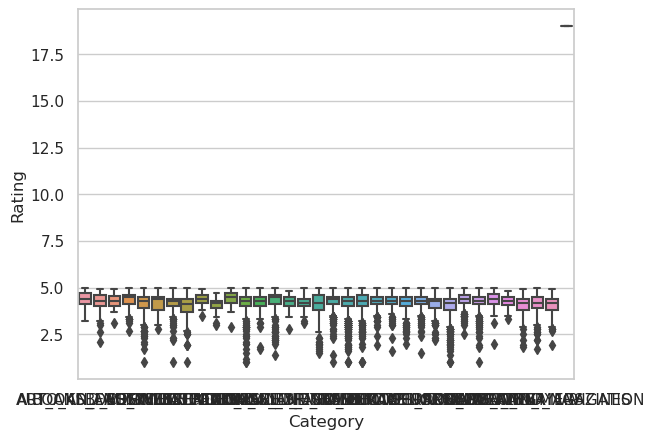

In [142]:


# Create a boxplot to compare the ratings of different app categories
sns.set(style="whitegrid")
sns.boxplot(x="Category", y="Rating", data=df1)


In [143]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data set have a missing value

In [144]:
# it may impact our analysis because the missing values could represent a significant portion of the data or they could contain important information that we need 
# for our analysis. In order to deal with missing values, we may need to either remove the rows with missing values or fill them in with some form of 
# imputation technique. It is important to carefully consider the impact of missing values on our analysis and choose an appropriate approach for dealing with them.

In [145]:
# Select relevant columns
df_size_rating = df1[['Size', 'Rating']]

# Clean the Size column
df_size_rating['Size'] = df_size_rating['Size'].apply(lambda x: str(x).replace('M', '').replace(',', '') if 'M' in str(x) else str(x))
df_size_rating['Size'] = df_size_rating['Size'].apply(lambda x: str(x).replace('k', '').replace(',', '') if 'k' in str(x) else str(x))
df_size_rating['Size'] = pd.to_numeric(df_size_rating['Size'], errors='coerce')


In [146]:
df_size_rating['Size'] 

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

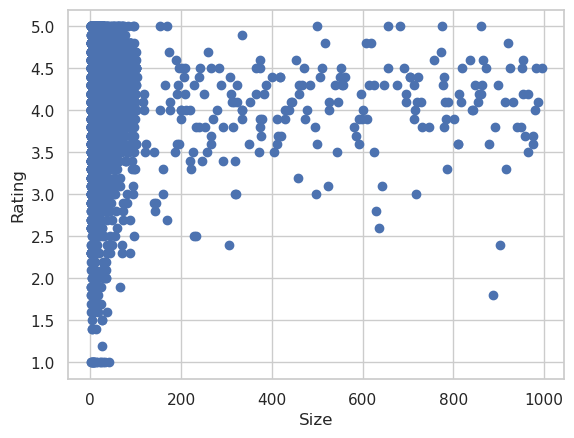

In [147]:
# Create scatter plot
plt.scatter(df_size_rating['Size'], df_size_rating['Rating'])

# Set the axis labels
plt.xlabel('Size')
plt.ylabel('Rating')

# Show the plot
plt.show()


In [150]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [151]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [152]:
df['Reviews'].astype('int')

ValueError: invalid literal for int() with base 10: '3.0M'

In [153]:
df1[df1['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [154]:
df_copy=df.copy()

In [155]:
df_copy=df_copy.drop(df_copy.index[10472])

In [156]:
df['Reviews'].str.isnumeric().sum()

10840

In [157]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [158]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)


In [159]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [160]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [161]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [162]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [163]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [164]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [165]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [166]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [167]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [168]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [169]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [170]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [171]:
df_copy['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [172]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observations
the dataset has duplicate records

In [173]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [174]:
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [175]:
# Lets go ahead and explore more data
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [176]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [179]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int64         
 14  Month           9659 non-null   int64         
 15  Yea

In [ ]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize 
# the relationship.

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps 
# with the highest number of installs.


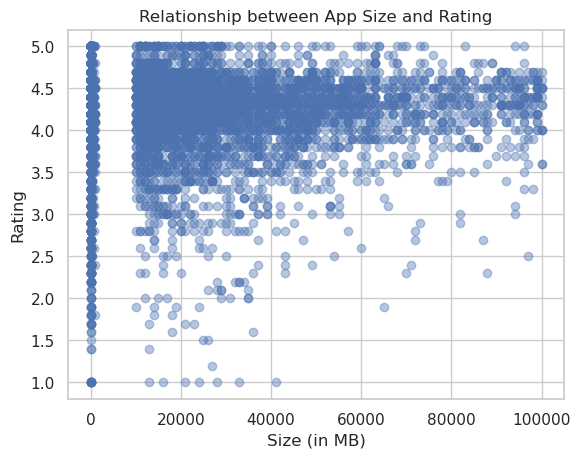

In [189]:
# Select relevant columns
df_size_rating = df_copy[['Size', 'Rating']]

# Create scatter plot
plt.scatter(df_size_rating['Size'], df_size_rating['Rating'], alpha=0.4)

# Set the axis labels and title
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.title('Relationship between App Size and Rating')

# Show the plot
plt.show()


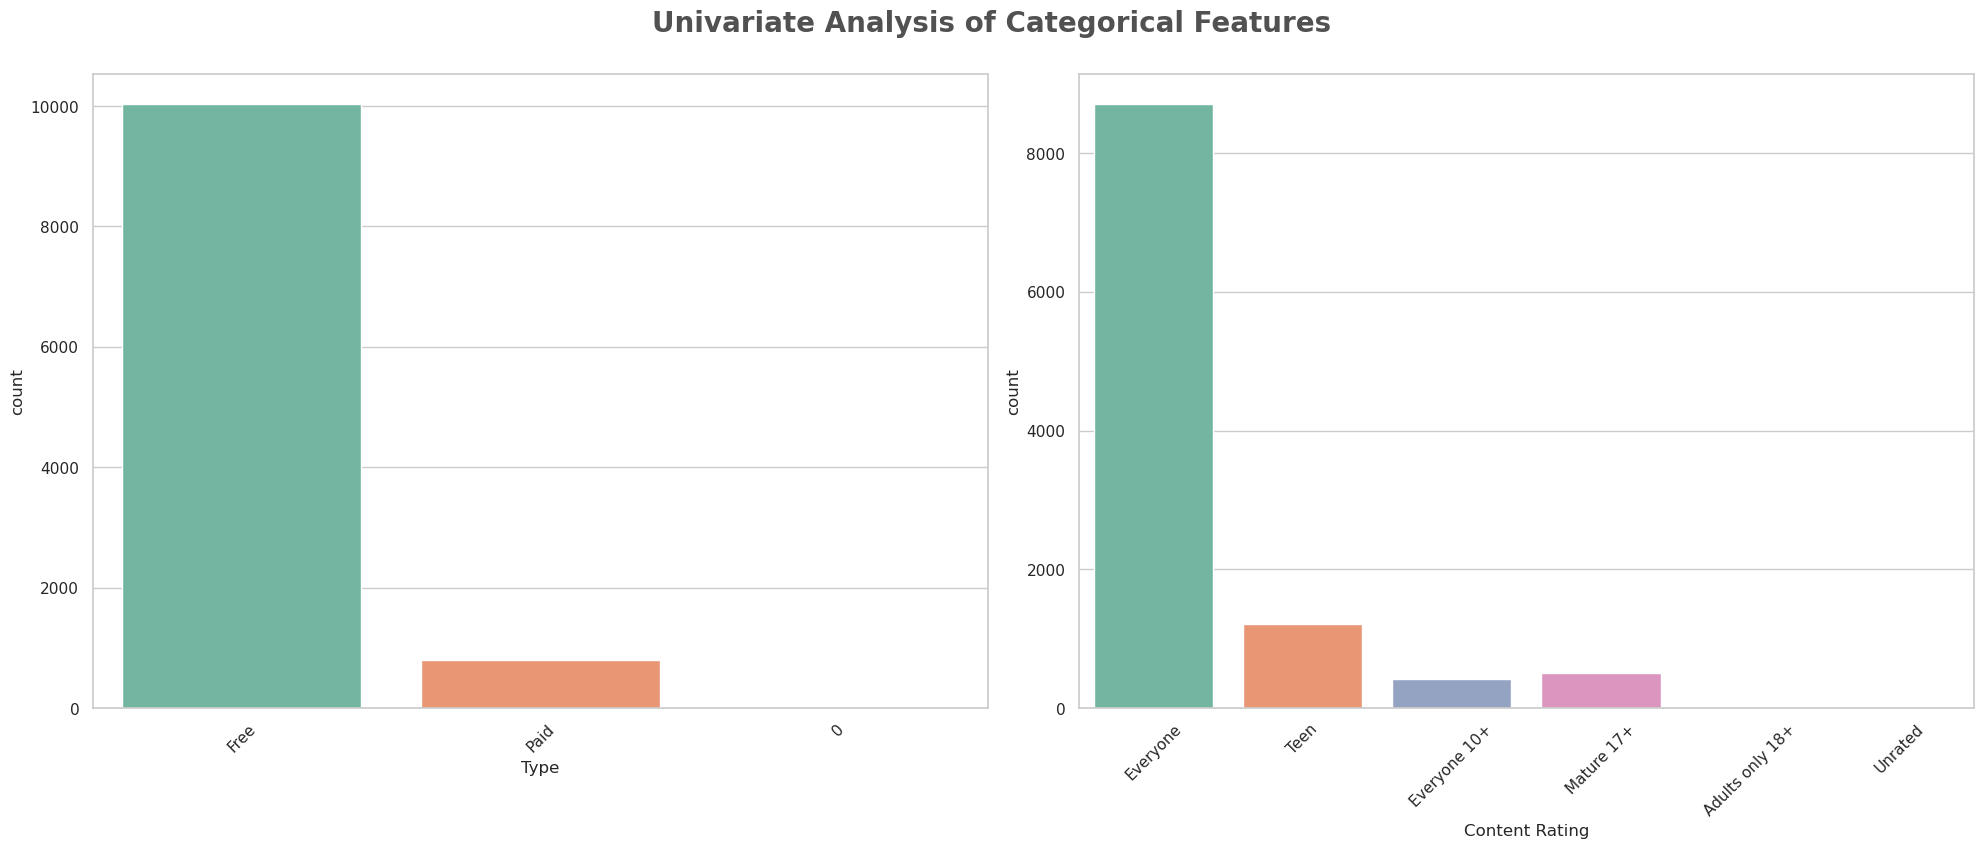

In [197]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

In [204]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the 
# Google Playstore dataset to identify the most popular app categories. How would you approach this 
# task, and what features would you analyze to make recommendations to the company?


In [203]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

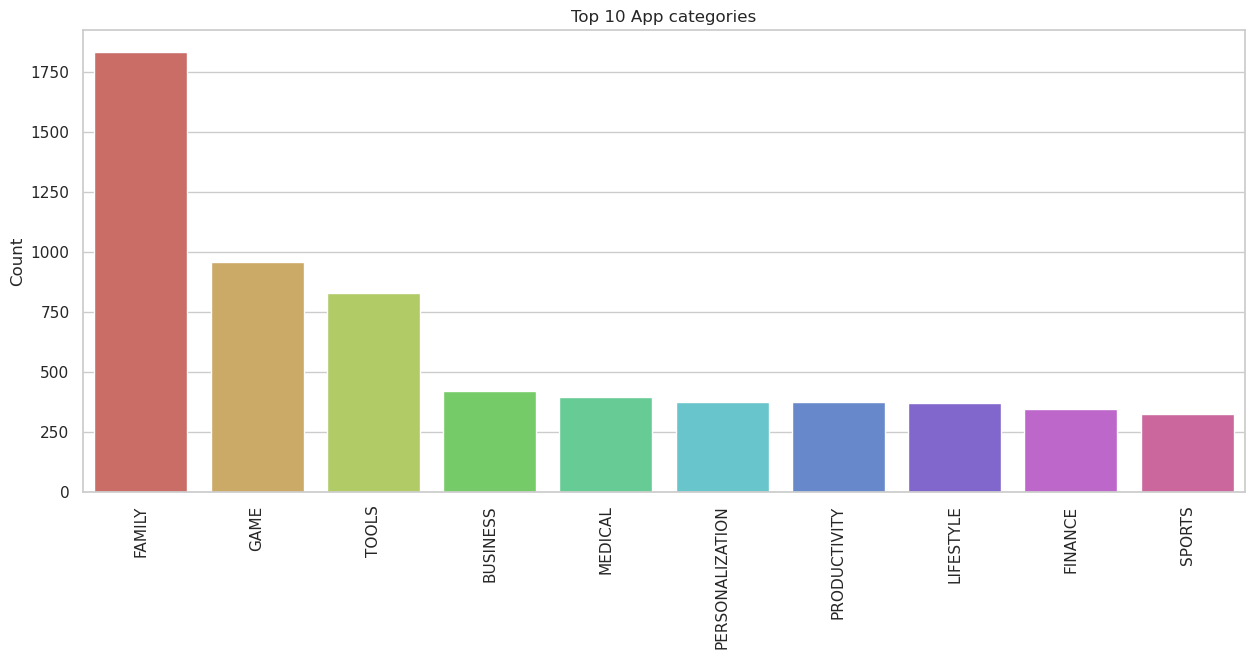

In [201]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Family app more populer

In [209]:
# To analyze the Google Playstore dataset and identify the most popular app categories, you can follow the following steps:

# Obtain the Google Playstore dataset: The first step is to obtain the Google Playstore dataset. 
# There are several sources where you can find this dataset, such as Kaggle, Google Cloud Platform, or directly from Google.

# Clean and preprocess the data: Once you have the dataset, you will need to clean and preprocess it. 
# This involves removing any duplicate entries, handling missing or incorrect data, and converting the data into a suitable 
# format for analysis.

# Explore the data: Once the data is cleaned, you can start exploring it to get a better understanding of the app categories 
# and their popularity. You can use visualizations such as bar charts or pie charts to explore the distribution of app categories.

# Analyze the data: To identify the most popular app categories, you can use various features such as the number of downloads, 
# user ratings, reviews, and app size. You can calculate the average number of downloads and user ratings for each app category
# to determine its popularity.

# Make recommendations: Based on the analysis, you can make recommendations to the company about the most popular app categories.
# You can also provide insights into the trends in app categories and suggest new app categories that have the potential to be popular.

# Some additional features that can be analyzed to make recommendations to the company are:

# Price: You can analyze the app prices to see if there is a correlation between the price and popularity.
# App content: You can analyze the app content to see which categories have the most content, 
# and whether there is a correlation between the amount of content and popularity.
# Release date: You can analyze the release date of the app to see if there is a correlation between the release date and popularity.

In [206]:

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the 
# most successful app developers. What features would you analyze to make recommendations to the 
# company, and what data visualizations would you use to present your findings?



In [207]:
# To identify the most successful app developers in the Google Playstore dataset, I would analyze the following features:

# Number of installs: This would indicate the popularity of the apps developed by a particular developer.
# Average rating: This would indicate the quality of the apps developed by a particular developer.
# App category: This would indicate the niche that a particular developer specializes in, and whether it is a lucrative one.
# Price: This would indicate the revenue generated by a particular developer.
# To present my findings, I would use the following data visualizations:

# A scatter plot of the number of installs vs. average rating, with each data point representing a developer. 
# This would help identify developers that have high-quality apps that are also popular.
# A bar chart of the average rating by app category, with each bar representing a developer. 
# This would help identify developers that specialize in lucrative app categories and have a high-quality rating.
# A bar chart of the average price by app category, with each bar representing a developer.
# This would help identify developers that have developed high-priced apps that generate a lot of revenue.
# By analyzing these features and presenting the findings using these data visualizations,
# the mobile app development company can make informed decisions on which developers to collaborate with to maximize their chances of success.

In [208]:
# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to 
# launch a new app. What features would you analyze to make recommendations to the company, and 
# what data visualizations would you use to present your findings?

In [ ]:
# To identify the best time to launch a new app, we can analyze the following features:

# Monthly app installs: We can analyze the monthly app installs to identify the months when the most number of apps are installed. 
# This will help in identifying the months when there is a high demand for new apps.

# App ratings: We can analyze the app ratings to identify the months when the apps are rated the highest. 
# This will help in identifying the months when the users are most satisfied with the apps.

# App updates: We can analyze the frequency of app updates to identify the months when the most number of app updates are released. 
# This will help in identifying the months when the developers are most active in improving the apps.

# App category: We can also analyze the app categories to identify the categories that are most popular among the users. 
# This will help in identifying the categories in which the new app can be launched.

# To present the findings, we can use the following data visualizations:

# Line chart: We can use a line chart to visualize the trend of monthly app installs over time. 
# This will help in identifying the months when the most number of apps are installed.

# Bar chart: We can use a bar chart to visualize the average app ratings by month. 
# This will help in identifying the months when the apps are rated the highest.

# Scatter plot: We can use a scatter plot to visualize the relationship between the frequency of app updates and the app ratings. 
# This will help in identifying the months when the apps are updated frequently and also have high ratings.

# Stacked bar chart: We can use a stacked bar chart to visualize the distribution of app categories by month. 
# This will help in identifying the months when the most popular app categories are in demand.